In [92]:
import os

print("Now we are in: ", os.getcwd())
cwd = "/Users/g-2024/Downloads/"
os.chdir(cwd)
print("Now we are in: ", os.getcwd())


Now we are in:  /Users/g-2024/Downloads
Now we are in:  /Users/g-2024/Downloads


In [93]:
# get txt data from web https://raw.githubusercontent.com/ibm-et/jupyter-samples/master/elasticity/springData.txt
# and write a file named springData.txt
import urllib.request
url = "https://raw.githubusercontent.com/ibm-et/jupyter-samples/master/elasticity/springData.txt"
urllib.request.urlretrieve(url, "springData.txt")



('springData.txt', <http.client.HTTPMessage at 0x12b16a2d0>)

In [94]:
import pylab

In [95]:
def getData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    masses = []
    dataFile.readline() # Ignore header
    for line in dataFile:
        d, m = line.split()
        distances.append(float(d))
        masses.append(float(m))
    dataFile.close()
    return (masses, distances)


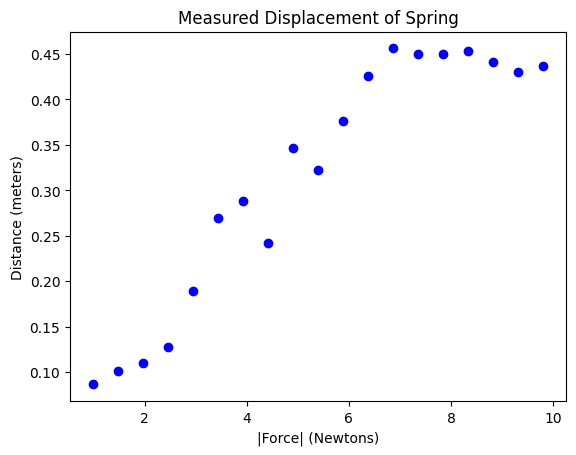

In [96]:

def plotData(fileName):
    masses, distances = getData(fileName)
    distances = pylab.array(distances)
    masses = pylab.array(masses)
    forces = masses*9.81
    pylab.plot(forces, distances, 'bo',
                label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')

plotData('springData.txt')

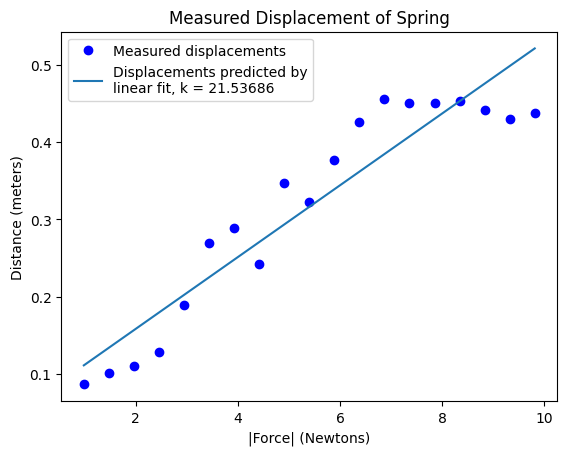

In [97]:
def fitData(inputFile):
    masses, distances = getData(inputFile)
    distances = pylab.array(distances)
    masses = pylab.array(masses)
    forces = masses*9.81
    pylab.plot(forces, distances, 'bo', label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    a, b = pylab.polyfit(forces, distances, 1)
    predictedDistances = a*forces + b
    k = 1.0/a
    pylab.plot(forces, predictedDistances, label=f'Displacements predicted by\nlinear fit, k = {round(k, 5)}')
    pylab.legend(loc='best')

fitData('springData.txt')

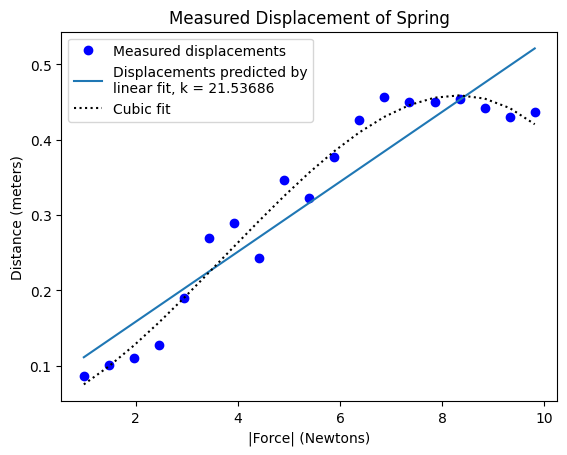

In [98]:
def fitData(inputFile):
    masses, distances = getData(inputFile)
    distances = pylab.array(distances)
    masses = pylab.array(masses)
    forces = masses*9.81
    pylab.plot(forces, distances, 'bo', label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    a, b = pylab.polyfit(forces, distances, 1)
    predictedDistances = a*forces + b
    k = 1.0/a
    pylab.plot(forces, predictedDistances, label=f'Displacements predicted by\nlinear fit, k = {round(k, 5)}')
    fit = pylab.polyfit(forces, distances, 3)
    predictedDistances = pylab.polyval(fit, forces)
    pylab.plot(forces, predictedDistances, 'k:', label='Cubic fit')
    pylab.legend(loc='best')

fitData('springData.txt')

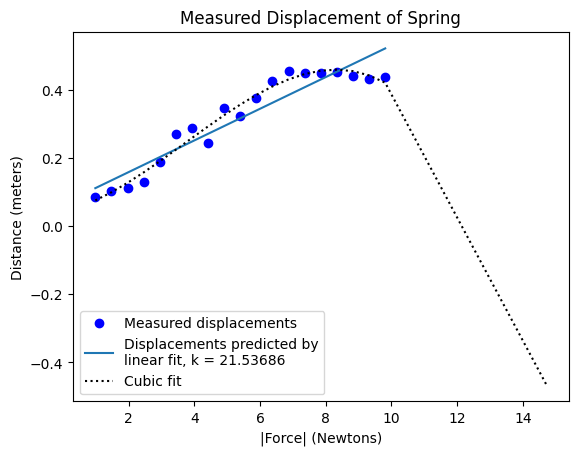

In [99]:
def fitData(inputFile):
    masses, distances = getData(inputFile)
    distances = pylab.array(distances)
    masses = pylab.array(masses)
    forces = masses*9.81
    pylab.plot(forces, distances, 'bo', label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    a, b = pylab.polyfit(forces, distances, 1)
    predictedDistances = a*forces + b
    k = 1.0/a
    pylab.plot(forces, predictedDistances, label=f'Displacements predicted by\nlinear fit, k = {round(k, 5)}')
    fit = pylab.polyfit(forces, distances, 3)
    #append 1.5kg mass
    forces = pylab.append(forces, 1.5*9.81)
    predictedDistances = pylab.polyval(fit, forces)
    pylab.plot(forces, predictedDistances, 'k:', label='Cubic fit')
    pylab.legend(loc='best')

fitData('springData.txt')

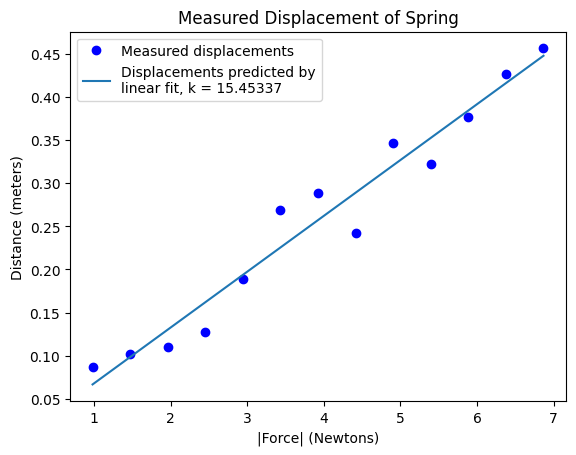

In [100]:
def fitData(inputFile):
    masses, distances = getData(inputFile)
    distances = pylab.array(distances[:-6])
    masses = pylab.array(masses[:-6])
    forces = masses*9.81
    pylab.plot(forces, distances, 'bo', label = 'Measured displacements')
    pylab.title('Measured Displacement of Spring')
    pylab.xlabel('|Force| (Newtons)')
    pylab.ylabel('Distance (meters)')
    a, b = pylab.polyfit(forces, distances, 1)
    predictedDistances = a*forces + b
    k = 1.0/a
    pylab.plot(forces, predictedDistances, label=f'Displacements predicted by\nlinear fit, k = {round(k, 5)}')
    pylab.legend(loc='best')

fitData('springData.txt')

In [103]:
url = "https://raw.githubusercontent.com/Buntin-Liz/Mit-Python/main/launcherData.txt"
urllib.request.urlretrieve(url, "launcherData.txt")


('launcherData.txt', <http.client.HTTPMessage at 0x12b932150>)

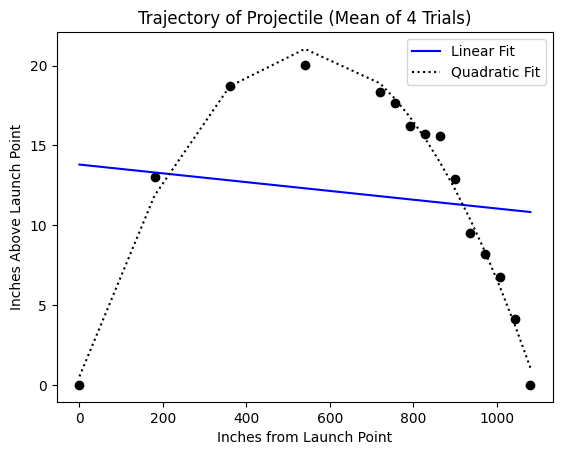

In [102]:
def getTrajectoryData(fileName):
    dataFile = open(fileName, 'r')
    distances = []
    height1,height2,height3,height4 = [],[],[],[]
    dataFile.readline() #
    for line in dataFile:
        d, h1,h2,h3,h4 = line.split()
        distances.append(float(d))
        height1.append(float(h1))
        height2.append(float(h2))
        height3.append(float(h3))
        height4.append(float(h4))
    dataFile.close()
    return (distances,[height1,height2,height3,height4])

def processTrajectories(fileName):
    distances, heights = getTrajectoryData(fileName)
    numTrials = len(heights)
    distances = pylab.array(distances)
    totHeights = pylab.array([0]*len(distances))
    for h in heights:
        totHeights = totHeights + pylab.array(h)
    meanHeights = totHeights/numTrials
    pylab.title(f'Trajectory of Projectile (Mean of {numTrials} Trials)')
    pylab.xlabel('Inches from Launch Point')
    pylab.ylabel('Inches Above Launch Point')
    pylab.plot(distances, meanHeights, 'ko')
    fit = pylab.polyfit(distances, meanHeights, 1)#直線適合
    altitudes = pylab.polyval(fit, distances)
    pylab.plot(distances, altitudes, 'b', label='Linear Fit')
    fit = pylab.polyfit(distances, meanHeights, 2)#2次関数による適合
    altitudes = pylab.polyval(fit, distances)
    pylab.plot(distances, altitudes, 'k:', label='Quadratic Fit')
    pylab.legend()

processTrajectories('launcherData.txt')